<a href="https://colab.research.google.com/github/reema9820/Task-1-Prediction-Using-Supervised-ML/blob/main/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TSF GRIP INTERNSHIP : TASK 1

Author: Reema Gupta

##Adding Libraries

In [ ]:
# importing libraries
import pandas as pd
from sklearn.linear_model import LinearRegression

##Importing Dataset From the Link

In [ ]:
#importing dataset
link = "http://bit.ly/w-data"
df= pd.read_csv(link)

In [ ]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

##Creating A 2D plot

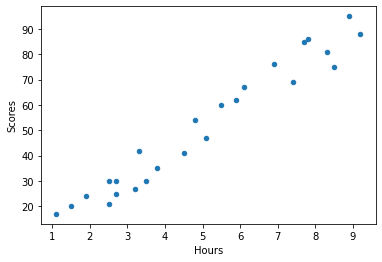

In [ ]:
# Plotting the distribution of scores
df.plot(x='Hours', y= 'Scores', kind='scatter')

##Split the Data in X & Y

Next step is to divide the data into inputs: X and Outputs :Y

In [ ]:
X = df.iloc[:, :-1].values  
Y = df.iloc[:, 1].values  

## Train test Split

In [ ]:
# Split data in Training and testing 
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size  = 0.3, random_state =7)

##Training the Algorithm by applying Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
reg = LinearRegression()
reg.fit(X_train, Y_train)

LinearRegression()

In [ ]:
reg.coef_, reg.intercept_

(array([9.87275449]), 1.7208083832335603)

In [ ]:
import matplotlib.pyplot as plt  

In [ ]:
line=reg.coef_*X+reg.intercept_

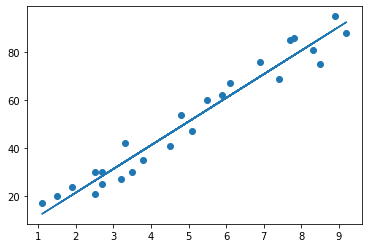

In [ ]:
#plotting the regression line and test data
plt.plot(X,line);
plt.scatter(X,Y)
plt.show()

##Predictions
After training the algorithm, it's time to make some predictions.

In [ ]:
Y_pred = reg.predict(X_test)# Predicting the scores

In [ ]:
df=pd.DataFrame({'Original': Y_test, 'Predict': Y_pred}) 

In [ ]:
df

,Original,Predict
0,47,52.071856
1,20,16.529940
2,62,59.970060
3,42,34.300898
4,27,33.313623
5,54,49.110030
6,25,28.377246
7,30,26.402695


##Checking for the case given in task

In [ ]:
import numpy as np
hours = 9.5
pred = reg.predict(np.array(hours).reshape(1,-1))
print("predict=",pred[0])


predict= 95.51197604790418


##Evaluating the model
I have chosen to calculate the rmse matric in order to evaluate the model

In [ ]:
#Calculating rmse matrix
from math import sqrt
def rmse_metric(actual, predicted):
    sum_error = 0.0
    for i in range(len(actual)):
        prediction_error = predicted[i] - actual[i]
        sum_error += (prediction_error ** 2)
    mean_error = sum_error / float(len(actual))
    return sqrt(mean_error)

In [ ]:
rmse_metric(Y_test,Y_pred)

4.864179014718323